# **PyTorch Custom Dataset**

## **Import Pytorch**

In [1]:
# Import
import torch
from torch import nn

# Check torch version
print(torch.__version__)

2.0.1+cu118


## **Device Agnostic Setting**

In [2]:
# Setup
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


## **Get Data**

In [3]:
# Imports
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Folder exists
if image_path.is_dir():
    print(f"{image_path} directory exists.")

# If Folder does not exist
else:
    # Create the folder
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


## **Data Preparation**

In [4]:
# Import os for path and directory management
import os

# Function to walk through a directory
def walk_through_dir(dir_path):
    # For every directory in dir_path
    for dirpath, dirnames, filenames in os.walk(dir_path):
        # Print the total amount of files
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Call the function
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [5]:
# Setup up training and testind data path
train_dir = image_path / "train"
test_dir = image_path / "test"

# View the directory path
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### **Visualize an Image**

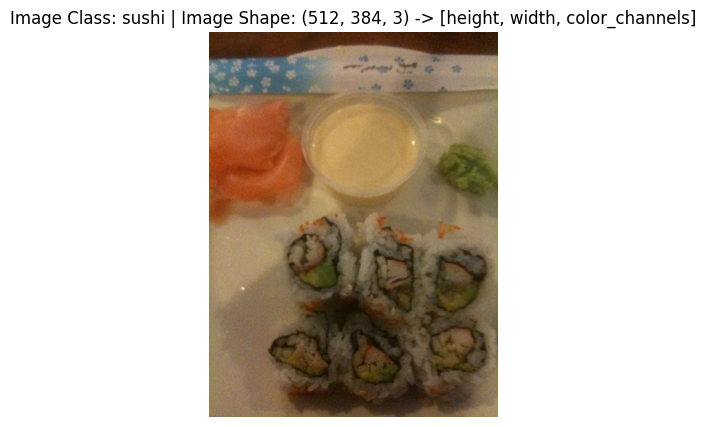

In [6]:
# Import
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
random.seed(42)

# Get all iamge paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Get random image path
random_image_path = random.choice(image_path_list)

# Get the class for the image
image_class = random_image_path.parent.stem

# Open the image
img = Image.open(random_image_path)

# Convert image to array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize = (8, 5))
plt.imshow(img_as_array)
plt.title(f"Image Class: {image_class} | Image Shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)
plt.show()

## **Data Transformation**

In [7]:
# Imports
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [8]:
# Transforms for image
data_transform = transforms.Compose([
    # Resize the images to 64 x 64
    transforms.Resize(size = (64, 64)),

    # Flip the image randomly on horizontal axis
    transforms.RandomHorizontalFlip(p = 0.5), # p = probability of flip

    # Turn the image into a torch.Tensor
    transforms.ToTensor() # This also convertes pixel values from 0 to 255 to be between 0.0 to 1.0
])

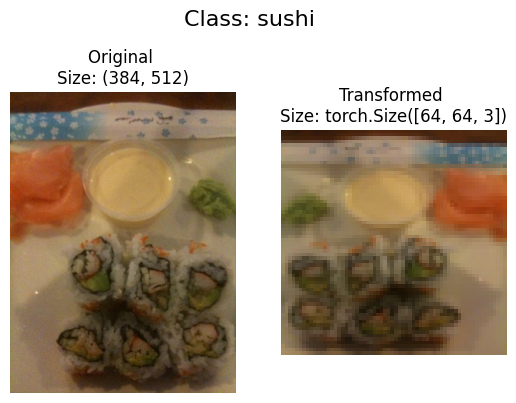

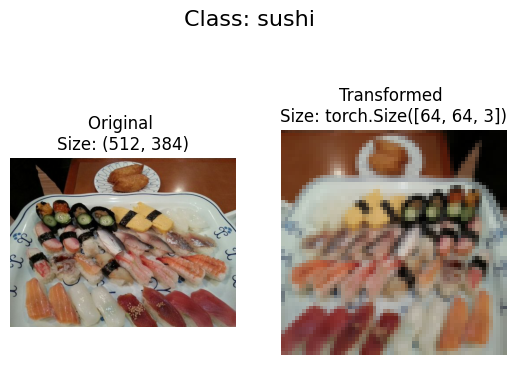

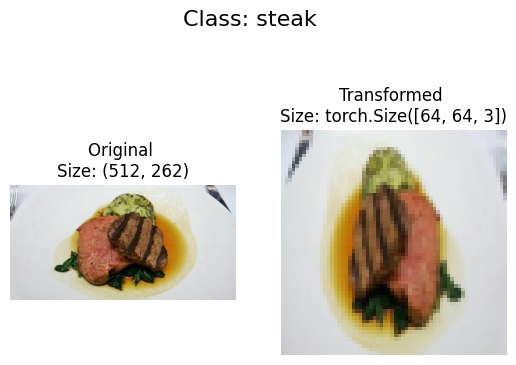

In [9]:
# Function to apply the transforms on sample images and view the transformed images
def plot_transformed_images(image_paths, transform, n = 3, seed = 42):
    # Set random seed
    random.seed(seed)

    # Get the random image samples
    random_image_paths = random.sample(image_paths, k = n)

    # Loop over image patches
    for image_path in random_image_paths:
        # Open the image
        with Image.open(image_path) as f:
            # Create a subplot to hold original and transformed image
            fig, ax = plt.subplots(1, 2)

            # Plot original image
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Get the transformed image
            # PyTorch defaultis [C, H, W] but Matplotlib defaultis [H, W, C]
            transformed_image = transform(f).permute(1, 2, 0)

            # Plot the transformed image
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            # Add the title
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)

# Call the function
plot_transformed_images(
    image_path_list,
    transform = data_transform,
    n = 3
)

## **Loading Image Data From Folder**

In [10]:
# Import
from torchvision import datasets

# Load the train data
train_data = datasets.ImageFolder(
    root = train_dir,
    transform = data_transform,
    target_transform = None
)

# Load the test data
test_data = datasets.ImageFolder(
    root = test_dir,
    transform = data_transform
)

# Print the train and test data
print(f"Train Data:\n{train_data}\n\nTest Data:\n{test_data}")

Train Data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

Test Data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [11]:
# Get class names list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [12]:
# Get class names dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [13]:
# Check the lengths of data
print(f"Train Data Length: {len(train_data)}")
print(f"Test Data Length: {len(test_data)}")

Train Data Length: 225
Test Data Length: 75


In [14]:
# Get data for first image in our dataset
img, label = train_data[0][0], train_data[0][1]

# Print the data
print(f"Image Tensor:\n{img}")
print(f"\n\nImage Shape:\n{img.shape}")
print(f"\n\nImage Datatype:\n{img.dtype}")
print(f"\n\nImage Label:\n{label}")
print(f"\n\nLabel Datatype:\n{type(label)}")

Image Tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Shape of Original Image: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Shape of Permuted Image: torch.Size([64, 64, 3]) -> [height, width, color_channels]


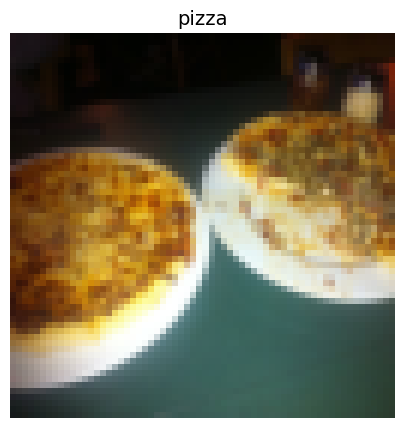

In [15]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print the shape of original and permuted image
print(f"Shape of Original Image: {img.shape} -> [color_channels, height, width]")
print(f"Shape of Permuted Image: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize = (8, 5))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 14)
plt.show()

### **DataLoader**

In [16]:
# Import
from torch.utils.data import DataLoader

# Create train data loader
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = 1, # Number of samples per batch
    num_workers = 1, # Number of subprocesses to use
    shuffle = True # Data shuffling
)

# Create test data loader
test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = 1,
    num_workers = 1,
    shuffle = False
)

# Print the dataloader
print(train_dataloader, test_dataloader)

<torch.utils.data.dataloader.DataLoader object at 0x7d569c18e980> <torch.utils.data.dataloader.DataLoader object at 0x7d569c18d660>


In [17]:
# Get the first image from the dataloader
img, label = next(iter(train_dataloader))

# Print the shape
print(f"Image Shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label Shape: {label.shape}")

Image Shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label Shape: torch.Size([1])


## **Loading Image Data with a Customer Dataset**

In [18]:
# Imports
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

### **Helper Function**

In [19]:
# Setup path for target directory
target_directory = train_dir
print(f"Target Directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class Names Found: {class_names_found}")

Target Directory: data/pizza_steak_sushi/train
Class Names Found: ['pizza', 'steak', 'sushi']


In [20]:
# Function to find the classes
def find_classes(directory: str) -> tuple[list[str], dict[str, int]]:
    # Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # Create a dictionary of index labels
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}

    # Return
    return classes, class_to_idx

In [21]:
# Call the function
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### **Create Custom Dataset**

In [22]:
# Import
from torch.utils.data import Dataset

# Create a subclass for out dataset
class ImageFolderCustom(Dataset):
    # Constructor
    def __init__(self, target_dir: str, transform: None) -> None:
        # Get all image paths
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))

        # Setup transforms
        self.transform = transform

        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(target_dir)

    # Method to load image
    def load_image(self, index: int) -> Image.Image:
        # Get the path for the iamge
        image_path = self.paths[index]

        # Return the loaded image
        return Image.open(image_path)

    # Overwrite the __len__() method
    def __len__(self) -> int:
        # Return the total number of image store
        return len(self.paths)

    # Overwrite the __getitem__() method
    def __getitem__(self, index: int) -> tuple[torch.Tensor, int]:
        # Load the image for the index
        img = self.load_image(index)

        # Get the class name and class_idx
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        # Transform if transforms are provided
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [23]:
# Augmentation for training data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

# Augmentaion for testing data
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [24]:
# Create instance of training and testing data using custom data
train_data_custom = ImageFolderCustom(
    target_dir = train_dir,
    transform = train_transforms
)

test_data_custom = ImageFolderCustom(
    target_dir = test_dir,
    transform = test_transforms
)

# View the custom train and test data
print(train_data_custom, test_data_custom)

<__main__.ImageFolderCustom object at 0x7d569c008820> <__main__.ImageFolderCustom object at 0x7d569c00b760>


In [25]:
# Check the lengths of data
print(f"Train Data Length: {len(train_data_custom)}")
print(f"Test Data Length: {len(test_data_custom)}")

Train Data Length: 225
Test Data Length: 75


In [26]:
# Get the classes of the data
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [27]:
# Get the class to index dictionary
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [28]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [29]:
# Function to display random images
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: list[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    # Adjust display if n is too high
    if n > 10:
        # Set n to 10
        n = 10

        # Set display shape to false
        display_shape = False

        # Print message
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # Set random seed
    if seed:
        random.seed(seed)

    # Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k = n)

    # Setup plot
    plt.figure(figsize = (16, 8))

    # Loop over index
    for i, target_sample in enumerate(random_samples_idx):
        # Get the image and label for the index
        target_image, target_label = dataset[target_sample][0], dataset[target_sample][1]

        # Adjust the image for matplotlib
        target_image_adjust = target_image.permute(1, 2, 0)

        # Plot the adjusted image
        plt.subplot(1, n, i + 1)
        plt.imshow(target_image_adjust)
        plt.axis("off")

        # If classes are available show the class
        if classes:
            # Initialize the title
            title = f"Class: {classes[target_label]}"

            # If display shape is set to true
            if display_shape:
                # Add the shape information to title
                title += f"\nShape: {target_image_adjust.shape}"

        # Add the title to image
        plt.title(title)

    # Show the plot
    plt.show()

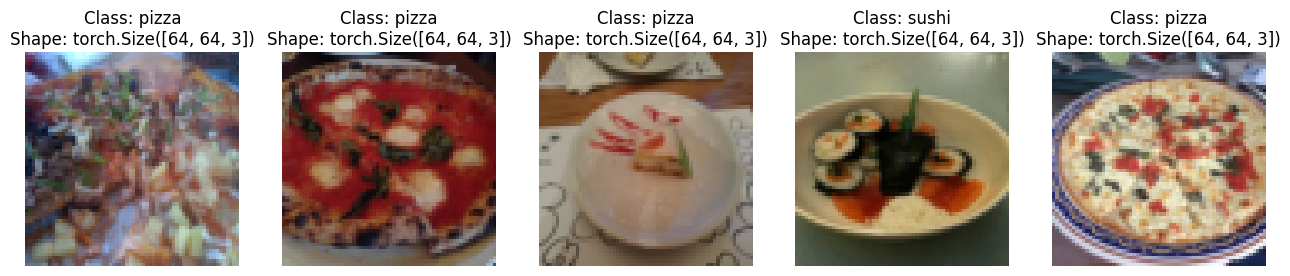

In [30]:
# Display random images from ImageFolder created Dataset
display_random_images(
    train_data,
    n = 5,
    classes = class_names,
    seed = None
)

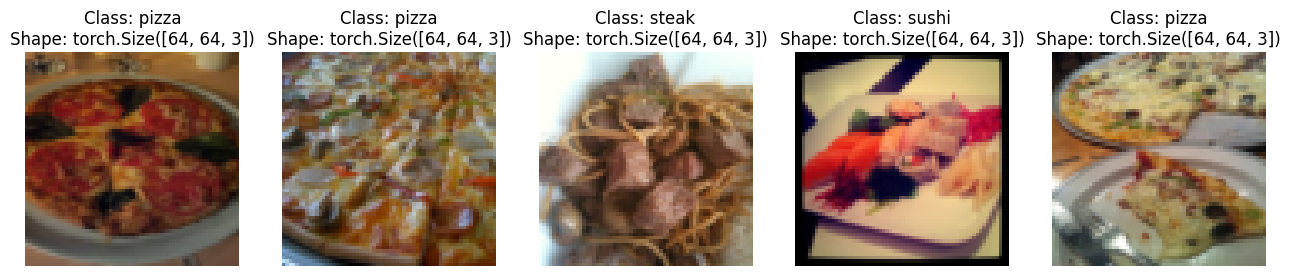

In [31]:
# Display random images from ImageFolder created Dataset
display_random_images(
    train_data_custom,
    n = 5,
    classes = class_names,
    seed = None
)

### **Turn Custom Loaded Images into DataLoader**

In [32]:
# Import
from torch.utils.data import DataLoader

# Train and test dataloader
train_dataloader_custom = DataLoader(
    dataset = test_data_custom,
    batch_size = 1,
    num_workers = 0,
    shuffle = True
)

test_dataloader_custom = DataLoader(
    dataset = test_data_custom,
    batch_size = 1,
    num_workers = 0,
    shuffle = False
)

# View the dataloader
print(train_dataloader_custom, test_dataloader_custom)

<torch.utils.data.dataloader.DataLoader object at 0x7d569be3c910> <torch.utils.data.dataloader.DataLoader object at 0x7d569be3ca00>


In [33]:
# Get the image and label from the custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# View the shape of the image and label
print(f"Image Shape: {img_custom.shape} -> [batch_size, color_channels, height, widht]")
print(f"Label Shape: {label_custom.shape}")

Image Shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, widht]
Label Shape: torch.Size([1])


## **Other Data Augmentation**

In [34]:
# Import
from torchvision import transforms

# Training transforms
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31), # Intensity
    transforms.ToTensor()
])

# Testing transforms
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

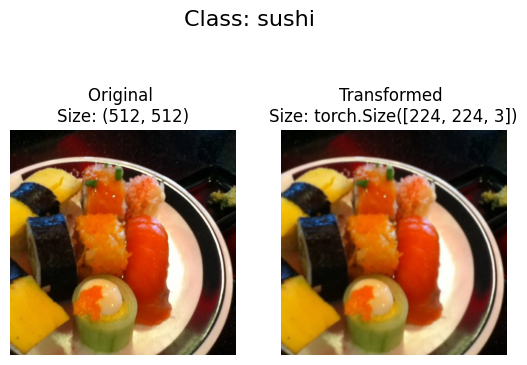

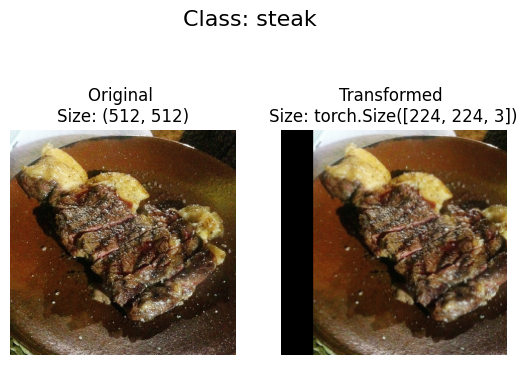

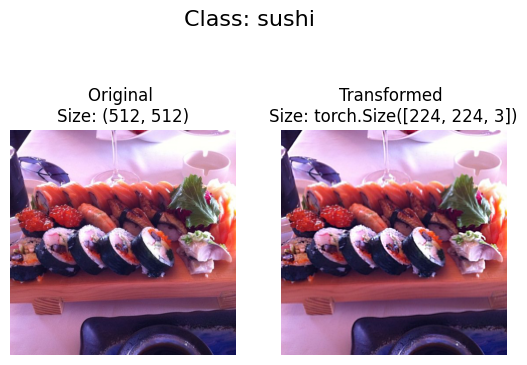

In [35]:
# Get paths to all images
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random image
plot_transformed_images(
    image_paths = image_path_list,
    transform = train_transforms,
    n = 3,
    seed = None
)

## **TinyVGG - Without Data Augmentation**

### **Simple Transform**

In [36]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

### **Prepare Data**

In [37]:
# Import
from torchvision import datasets

# Load and transform the data
train_data_simple = datasets.ImageFolder(root = train_dir, transform = simple_transform)
test_data_simple = datasets.ImageFolder(root = test_dir, transform = simple_transform)

# Import
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(
    train_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    test_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = False,
    num_workers = NUM_WORKERS
)

# Print dataloaders
train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7d569bccb760>,
 <torch.utils.data.dataloader.DataLoader at 0x7d569bccb370>)

### **TinyVGG Model**

In [38]:
# Class for TinyVGG
class TinyVGG(nn.Module):
    # Constructor
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        # Class constructor of the parent class
        super().__init__()

        # Block 1
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels = input_shape,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size = 2,
                stride = 2)
        )

        # Block 2
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Classifier output head
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features = hidden_units * 16 * 16,
                out_features = output_shape
            )
        )

    # Function for forward pass
    def forward(self, x: torch.Tensor):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

# Set manual seed
torch.manual_seed(42)

# Initialize a model
tiny_vgg_no_aug = TinyVGG(
    input_shape = 3,
    hidden_units = 10,
    output_shape = len(train_data.classes)).to(device)

# View the model
tiny_vgg_no_aug

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### **Torch Info**

In [39]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo --quiet
    import torchinfo

# Import summary from torchinfo
from torchinfo import summary

# View the summary of the model
summary(tiny_vgg_no_aug, input_size = [1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### **Train and Test Loop Functions**

In [40]:
# Function for train loop
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [41]:
# Function for test loop
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### **Train Function**

In [42]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # Create empty results dictionary
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        # Run the training loop
        train_loss, train_acc = train_step(model = model,
                                           dataloader = train_dataloader,
                                           loss_fn = loss_fn,
                                           optimizer = optimizer)
        # Run the testing loop
        test_loss, test_acc = test_step(model = model,
                                        dataloader = test_dataloader,
                                        loss_fn = loss_fn)

        # Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

### **Training**

In [43]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
tiny_vgg_no_aug = TinyVGG(input_shape = 3,
                          hidden_units = 10,
                          output_shape = len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = tiny_vgg_no_aug.parameters(), lr = 1e-3)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train tiny_vgg_no_aug
tiny_vgg_no_aug_results = train(model = tiny_vgg_no_aug,
                                train_dataloader = train_dataloader_simple,
                                test_dataloader = test_dataloader_simple,
                                optimizer = optimizer,
                                loss_fn = loss_fn,
                                epochs = NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1360 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0847 | train_acc: 0.4258 | test_loss: 1.1620 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1157 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0955 | train_acc: 0.4141 | test_loss: 1.1386 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0981 | train_acc: 0.2930 | test_loss: 1.1435 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0955 | train_acc: 0.2500 | test_loss: 1.1479 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.1190 | train_acc: 0.3320 | test_loss: 1.1428 | test_acc: 0.2708
Epoch: 8 | train_loss: 1.1021 | train_acc: 0.3672 | test_loss: 1.1083 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.0917 | train_acc: 0.3594 | test_loss: 1.0850 | test_acc: 0.5833
Epoch: 10 | train_loss: 1.0720 | train_acc: 0.4453 | test_loss: 1.0549 | test_acc: 0.5938
Total training time: 39.069 seconds


In [44]:
# Check out the model keys
tiny_vgg_no_aug_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

### **Loss Curves**

In [45]:
# Function to plot the loss curves
def plot_loss_curves(results: dict[str, list[float]]):
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize = (12, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = 'train_loss')
    plt.plot(epochs, test_loss, label = 'test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = 'train_accuracy')
    plt.plot(epochs, test_accuracy, label = 'test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

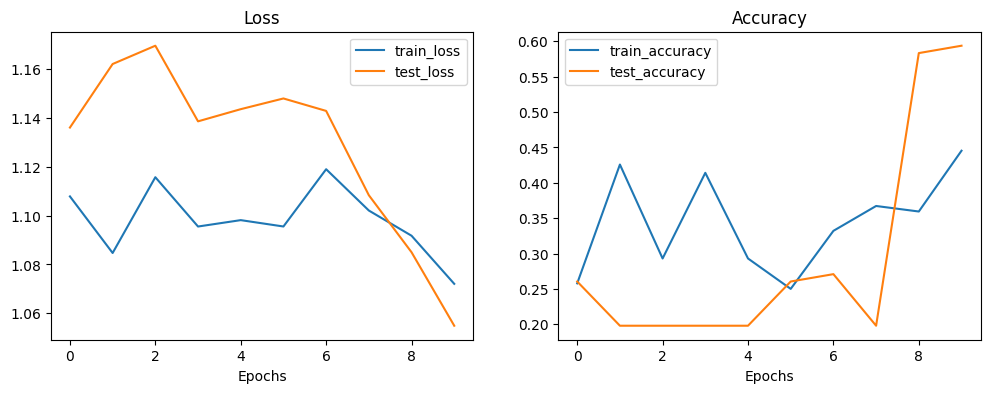

In [46]:
# Call the function to plot the loss
plot_loss_curves(tiny_vgg_no_aug_results)

## **TinyVGG - With Data Augmentation**

### **Transforms**

In [47]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

### **Prepare Data**

In [48]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform = train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform = test_transform)

# View datasets
train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [49]:
# Imports
import os

# Constants
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Set manual seed
torch.manual_seed(42)

# Convert datasets to dataloader
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size = BATCH_SIZE,
                                        shuffle = True,
                                        num_workers = NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle = False,
                                    num_workers = NUM_WORKERS)

# View the data loader
train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d569bfcdf00>,
 <torch.utils.data.dataloader.DataLoader at 0x7d569c18d660>)

In [50]:
# Set manual seed
torch.manual_seed(42)

# Initialize model
tiny_vgg_aug = TinyVGG(
    input_shape = 3,
    hidden_units = 10,
    output_shape = len(train_data_augmented.classes)).to(device)

# View the model
tiny_vgg_aug

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### **Training**

In [51]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = tiny_vgg_aug.parameters(), lr = 1e-1)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train tiny_vgg_aug
tiny_vgg_aug_results = train(model = tiny_vgg_aug,
                             train_dataloader = train_dataloader_augmented,
                             test_dataloader = test_dataloader_simple,
                             optimizer = optimizer,
                             loss_fn = loss_fn,
                             epochs = NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 112.6361 | train_acc: 0.3945 | test_loss: 1.2041 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0826 | train_acc: 0.4258 | test_loss: 1.2511 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0969 | train_acc: 0.4258 | test_loss: 1.2234 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1354 | train_acc: 0.3047 | test_loss: 1.1657 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.1017 | train_acc: 0.2969 | test_loss: 1.1481 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0954 | train_acc: 0.2891 | test_loss: 1.1375 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.0873 | train_acc: 0.4141 | test_loss: 1.1496 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1229 | train_acc: 0.2930 | test_loss: 1.1658 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.1284 | train_acc: 0.2930 | test_loss: 1.1467 | test_acc: 0.2604
Epoch: 10 | train_loss: 1.0924 | train_acc: 0.4258 | test_loss: 1.0755 | test_acc: 0.2604
Total training time: 29.099 seconds


### **Plot Loss Curves**

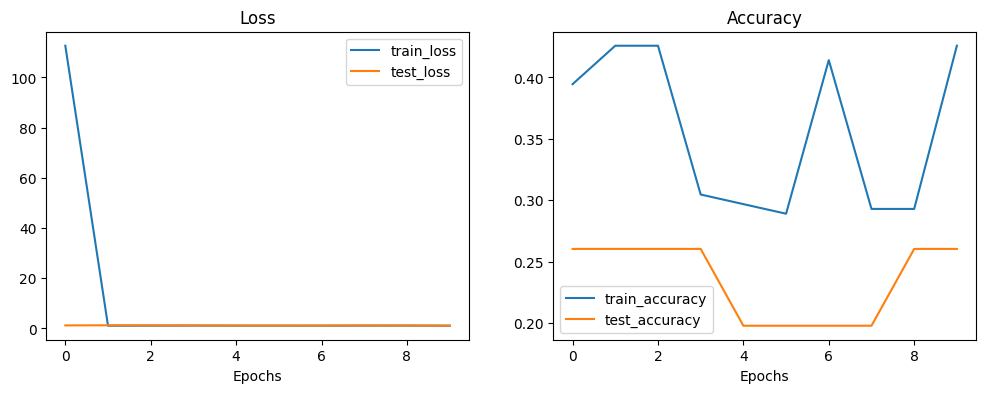

In [52]:
# Plot loss curves
plot_loss_curves(tiny_vgg_aug_results)

## **Compare Model Results**

In [53]:
# Import
import pandas as pd

# Create dataframe
tiny_vgg_no_aug_df = pd.DataFrame(tiny_vgg_no_aug_results)
tiny_vgg_aug_df = pd.DataFrame(tiny_vgg_aug_results)

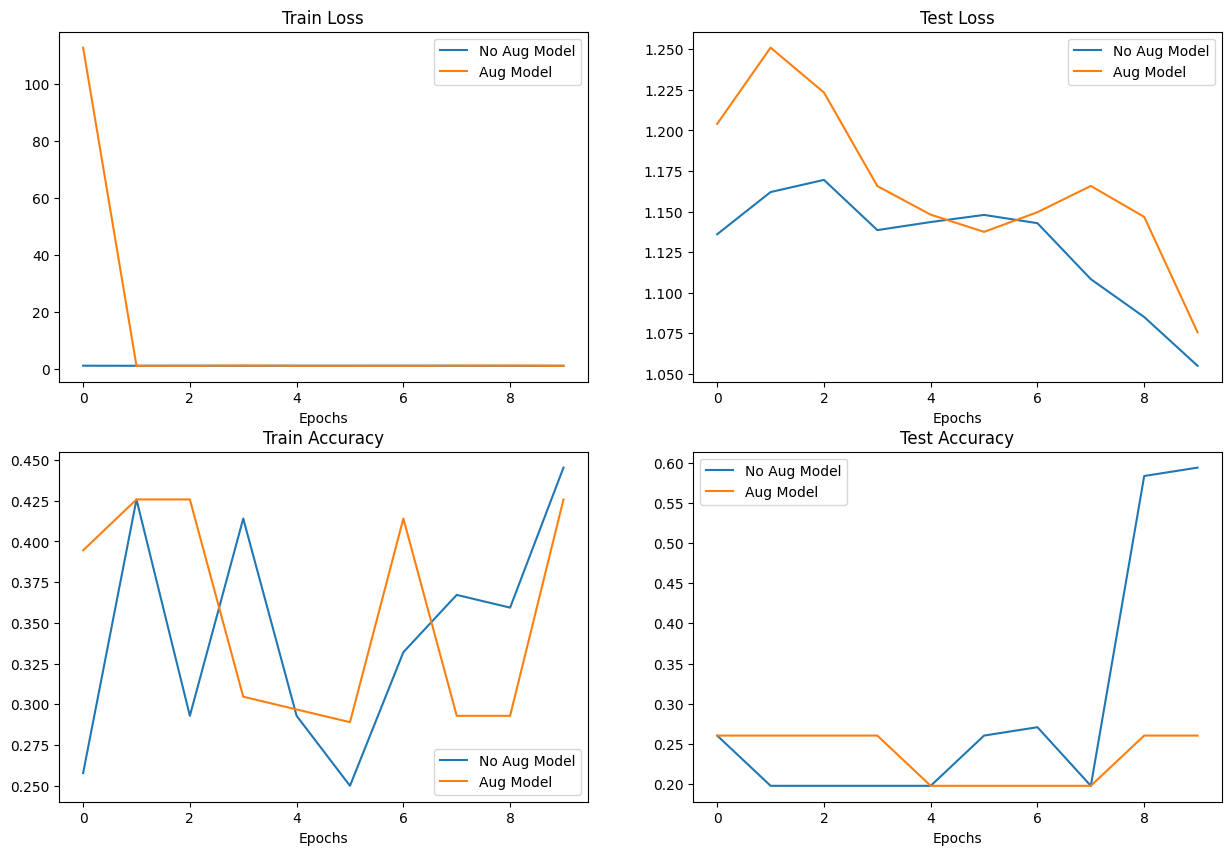

In [54]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(tiny_vgg_no_aug_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, tiny_vgg_no_aug_df["train_loss"], label = "No Aug Model")
plt.plot(epochs, tiny_vgg_aug_df["train_loss"], label = "Aug Model")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, tiny_vgg_no_aug_df["test_loss"], label = "No Aug Model")
plt.plot(epochs, tiny_vgg_aug_df["test_loss"], label = "Aug Model")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, tiny_vgg_no_aug_df["train_acc"], label = "No Aug Model")
plt.plot(epochs, tiny_vgg_aug_df["train_acc"], label = "Aug Model")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, tiny_vgg_no_aug_df["test_acc"], label = "No Aug Model")
plt.plot(epochs, tiny_vgg_aug_df["test_acc"], label = "Aug Model")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## **Prediction**

In [55]:
# Import
import torchvision

# Function to get prediction of custom image
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: list[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # Transform if necessary
    if transform:
        target_image = transform(target_image)

    # Make sure the model is on the target device
    model.to(device)

    # Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

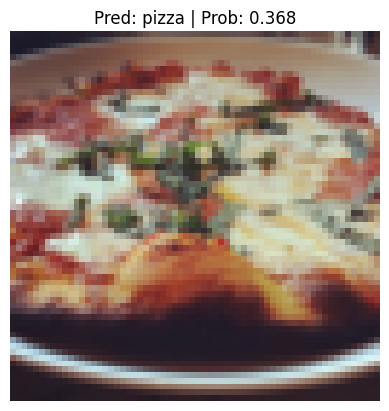

In [56]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64), antialias = True),
])

# Pred on our custom image
pred_and_plot_image(model = tiny_vgg_aug,
                    image_path = "./data/pizza_steak_sushi/test/pizza/2019408.jpg",
                    class_names = class_names,
                    transform = custom_image_transform,
                    device = device)

## **Save Model**

In [57]:
# Mount google drive
from google.colab import drive
drive.mount("./Drive", force_remount = True)

Mounted at ./Drive


In [58]:
# Path to handle paths to files / folders
from pathlib import Path

# Create models directory
MODEL_PATH = Path("./Drive/MyDrive/PyTorch Course/models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# Create model save path
MODEL_NAME = "04_pytorch_tiny_vgg_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj = tiny_vgg_aug.state_dict(), f = MODEL_SAVE_PATH)

Saving Model to: Drive/MyDrive/PyTorch Course/models/04_pytorch_tiny_vgg_model.pth


In [59]:
# Check the saved file path
!ls -l "./Drive/MyDrive/PyTorch Course/models/04_pytorch_tiny_vgg_model.pth"

-rw------- 1 root root 46559 Jul 23 14:46 './Drive/MyDrive/PyTorch Course/models/04_pytorch_tiny_vgg_model.pth'


## **Load Model**

### **Check Loaded Model**

In [60]:
# Set manual seed
torch.manual_seed(42)

# Initialize model
tiny_vgg_loaded = TinyVGG(
    input_shape = 3,
    hidden_units = 10,
    output_shape = len(train_data_augmented.classes)).to(device)

In [61]:
# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
tiny_vgg_loaded.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>